<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークの基礎
## MNISTデータセット

In [0]:
# tensorflowのインストール(初回のみコメントアウトを外して実行してください。)
# version 1.6を使用
! pip install -U tensorflow==1.6.0
# Kerasのインストール(初回のみコメントアウトを外して実行してください。)
# version 2.0を使用
! pip install -U keras==2.0

     |████████████████████████████████| 45.9MB 1.2MB/s 
     |████████████████████████████████| 3.1MB 31.6MB/s 
     |████████████████████████████████| 890kB 38.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.6.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Found existing installation: tensorflow 1.14.0rc1
    Uninstalling tensorflow-1.14.0rc1:
      Successfully uninstalled tensorflow-1.14.0rc1
     |████████████████████████████████| 194kB 3.5MB/s 
  St

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

#kerasではバックエンドでTensorFlowを回しているのでkeras使用時は毎回importする。
import tensorflow as tf
import keras

#層構造のモデルを定義するためのメソッド（kerasのモデル構築で必ず使う）
from keras.models import Sequential

# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
#Flattenは二次元配列を一次元配列に変換する層
from keras.layers import Dense, Activation, Flatten

#SGD：ディープラーニングにおいて最も基本的な最適化手法
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
# tensorflowのバージョン確認（1.6.0）
tf.__version__

'1.6.0'

In [0]:
# kerasのバージョンを確認（2.0.0）
keras.__version__

'2.0.0'

In [0]:
#keras内のMNISTデータセット
from keras.datasets import mnist
#one-hot-encoding用のライブラリ(＊後述)
from keras.utils import np_utils

# MNISTデータのロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# 画像データ（X_train, X_test)の形を確認
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
# 正解ラベルデータ（y_train, y_test)の形を確認
y_train.shape, y_test.shape

((60000,), (10000,))

In [0]:
# ベクトル化されたモノクロ画像の一枚目を確認
# 0〜255の整数値が入っている
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
# 画像データはuintなのでkerasへの入力用にfloatにデータを変換

# .astype('float')でも可。intへの変換なら.astype('i')と記述することも可能。
X_train = X_train.astype('f')
# この書き方はNumpy形式でのみ使える。
X_test = X_test.astype('f')

# 画素を0.0-1.0の範囲に正規化
X_train /= 255
X_test /= 255

In [0]:
# One-Hot-Encoding（クラス数値表現　＝＞　One-Hot表現）

# Kerasに入力するためにyをOne-Hot表現に変換。今回変換にはKerasのup_utilsモジュールを使用します。
# （例：[1, 0, 2] -> [[0, 1, 0],[1, 0, 0],[0, 0, 1]])

Y_train = np_utils.to_categorical(y_train, num_classes=10).astype('i') 
Y_test = np_utils.to_categorical(y_test, num_classes=10).astype('i')

# One-Hot表現になっているか確認 -> shapeメソッド
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [0]:
# Y_trainの0番目の行でOne-Hot表現を確認してみる
Y_train[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [0]:
# One-Hot-Encoding前のクラス数値表現な正解ラベルデータ
y_train[0]

5

In [0]:
# One-Hot表現から数値表現へ戻す方法
#データが１つの場合（axisが0しかないので）： Y_train[0].argmax()
y_train_return = Y_train.argmax(axis=1) 

#全て元の数値と同じか確認
(y_train_return == y_train).all()

True

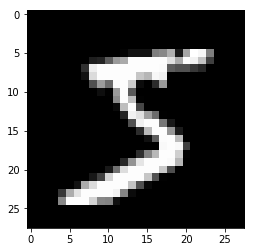

In [0]:
# 画像を出力
# indexを指定
index = 0
plt.imshow(X_train[index])
plt.gray()
plt.show()

In [0]:
# 出力した画像の正解ラベルを確認(One-hot表現なのでargmax()で列の番号を出力）
Y_train[index].argmax()

5

In [0]:
# ミニバッチに含まれるサンプル数を指定
# データからサンプルを100個ずつ取り出して学習する（経験則的だが分類するクラス数以上にすると良いことが多い）
batch_size = 100

In [0]:
# epoch数を指定（計算リソースと相談、過学習が起きることもあるので多ければ良いというわけではないが基本は多い方が精度が高い）
n_epoch = 20

In [0]:
#-----------
# MLPモデル
#-----------

model = Sequential()  # モデルのインスタンスを作成（モデルを作る度に作成する必要がある）
# addメソッドで層を追加していく。
# Flatten: 二次元配列を一次元配列に変換する層
# 入力層に配置しているときはinput_shapeに入力サイズを指定。
model.add(Flatten(input_shape=(28, 28)))

# Dense: 全結合（線形結合）レイヤーです。引数に出力サイズ（1次元）を指定する。
model.add(Dense(900))

# Activation: 活性化関数を定義。今回は最もポピュラーなReLU関数。他にも"sigmoid"：シグモイド関数などがある。
model.add(Activation('relu'))

# 以下同じような要領で層を重ねていく
model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dense(500))
model.add(Activation('relu'))

# 出力層：最後の線形結合レイヤーは分類するクラス数に指定。
# 活性化関数は分類なのでSoftmax関数（回帰なら恒等関数＝そのまま出力）
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
# 損失関数(＝誤差関数）は分類では定番の交差エントロピー誤差（回帰ならRMSEが定番）
# 最適化手法は基本的な確率的勾配降下法(SGD)（一番ポピュラーなのはAdam　＊後述）
# 評価方法は精度（Accuracy）に指定。学習時での出力評価に使われる。

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


* 訓練用入力データ（X_train）
* 訓練用出力データ（Y_train）
* epochs：エポック数
* validation_data：テストデータのタプル（X_test, Y_test）
* varbose：学習時の表示について（1:通常表示、0:表示なし、2:エポックと出力のみ表示）
* batch_size：バッチサイズ

In [0]:
#実際に学習させる（注意：hist変数は学習終了後生成されるので中断したら参照できない）
hist = model.fit(X_train,
                 Y_train,
                 epochs=n_epoch,
                 validation_data=(X_test, Y_test),
                 verbose=1,
                 batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s - loss: 0.9387 - acc: 0.7959 - val_loss: 0.3905 - val_acc: 0.8984
Epoch 2/20
60000/60000 [==============================] - 36s - loss: 0.3529 - acc: 0.9033 - val_loss: 0.2959 - val_acc: 0.9172
Epoch 3/20
60000/60000 [==============================] - 36s - loss: 0.2886 - acc: 0.9192 - val_loss: 0.2584 - val_acc: 0.9259
Epoch 4/20
60000/60000 [==============================] - 36s - loss: 0.2533 - acc: 0.9281 - val_loss: 0.2324 - val_acc: 0.9346
Epoch 5/20
60000/60000 [==============================] - 36s - loss: 0.2276 - acc: 0.9355 - val_loss: 0.2134 - val_acc: 0.9390
Epoch 6/20
60000/60000 [==============================] - 36s - loss: 0.2068 - acc: 0.9408 - val_loss: 0.1966 - val_acc: 0.9450
Epoch 7/20
60000/60000 [==============================] - 36s - loss: 0.1895 - acc: 0.9457 - val_loss: 0.1809 - val_acc: 0.9473
Epoch 8/20
60000/60000 [==============================

In [0]:
# 学習精度をテストデータで確認できる（学習時にvalidation_dataとして入力していたら必要ない）
loss_and_metrics = model.evaluate(X_test, Y_test)
loss_and_metrics #（損失値、精度）を返す

 9920/10000 [============================>.] - ETA: 0s

[0.10067658730279654, 0.9693]

In [0]:
# エポックごとの精度と損失値を確認できる。コンパイル時に損失関数や評価関数は変更可能。
# val_〜はテストデータに対する精度と損失値。それ以外は訓練データに対する精度、損失値。
hist.history

{'acc': [0.7958999997253219,
  0.9033166678746541,
  0.919166668454806,
  0.9281333354115486,
  0.9355000016093254,
  0.9408000014225641,
  0.945716668665409,
  0.9503500018517176,
  0.9541833360989889,
  0.9572500027219455,
  0.9600833381215731,
  0.9620666706562042,
  0.965450004140536,
  0.9673500070969264,
  0.9691000071167946,
  0.9707833414276441,
  0.9723333417375882,
  0.9733333419760068,
  0.9747333422303199,
  0.9769000095129013],
 'loss': [0.9386502607663473,
  0.352861731822292,
  0.2885679629445076,
  0.25333124183118344,
  0.22757761082301536,
  0.20680496451134484,
  0.18951363369822502,
  0.1746620008846124,
  0.16212350685149432,
  0.15100050430744885,
  0.14067943767334024,
  0.13227985829114913,
  0.12397724523519477,
  0.11678096749509374,
  0.11018010848512252,
  0.10449804591014981,
  0.098787982002832,
  0.09399973734902839,
  0.08930831823808451,
  0.08472960556857288],
 'val_acc': [0.8984000033140183,
  0.9172000008821487,
  0.9259000021219254,
  0.934599998593

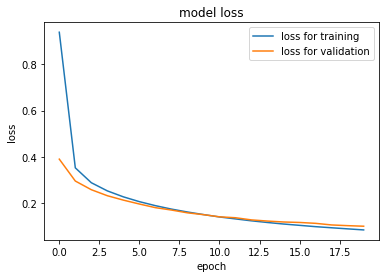

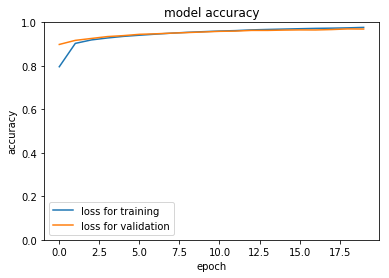

In [0]:
# プロットして損失値と精度の推移を視覚化するのは非常に重要な作業なので特に理由がなければ毎度表示する。
# 過学習や学習不足が確認できる。


# 損失値(Loss)の遷移のプロット
def plot_history_loss(hist):
    
    # hist.historyに辞書型で損失値や精度が入っているので取得して表示
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    
    #matplotlibの細かい設定
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    
    plt.show()

    
# 精度(Accuracy)の遷移のプロット
def plot_history_acc(hist):
    plt.plot(hist.history['acc'],label="loss for training")
    plt.plot(hist.history['val_acc'],label="loss for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

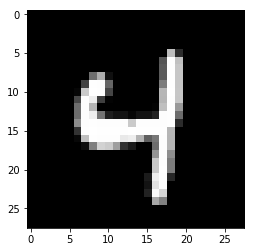

In [0]:
# testデータ内のサンプルをピックアップ
# indexを指定して任意の画像を選択
index = 1230
plt.imshow(X_test[index])
plt.show()

In [0]:
# 予測を行い､答え合わせをする

# 予測はクラスの確率的表現（softmax関数より）で出てくるのでargmaxで最大の列番号を取得
pred = model.predict(X_test[index].reshape(1, 28, 28)).argmax()
ans  = Y_test[index].argmax()

print('predict: ', pred)
print('answer : ', ans)

if pred == ans:
    print('正解です｡')
else:
    print('不正解です')

predict:  4
answer :  4
正解です｡


In [0]:
# 混同行列を出力
# testデータに対して行うことに注意
from sklearn.metrics import confusion_matrix as cm
result = model.predict(X_test).argmax(axis=1)
cm(y_test, result)  # y_testはOne-Hot表現にする前のデータ形式に注意

array([[ 969,    0,    2,    0,    1,    2,    2,    2,    2,    0],
       [   0, 1119,    3,    1,    0,    0,    4,    2,    6,    0],
       [   5,    1, 1008,    3,    4,    0,    1,    7,    2,    1],
       [   1,    0,    6,  984,    0,    3,    0,    8,    5,    3],
       [   1,    0,    8,    0,  954,    0,    1,    2,    2,   14],
       [   5,    1,    1,   11,    2,  851,    8,    1,    8,    4],
       [   6,    3,    3,    1,    7,   11,  921,    2,    4,    0],
       [   0,    7,   11,    3,    2,    1,    0,  994,    1,    9],
       [   3,    1,    5,   11,    3,    4,    4,    5,  936,    2],
       [   6,    5,    2,   12,   14,    0,    0,   11,    2,  957]])

In [0]:
# 正解ラベルが出力されている
result

array([7, 2, 1, ..., 4, 5, 6])

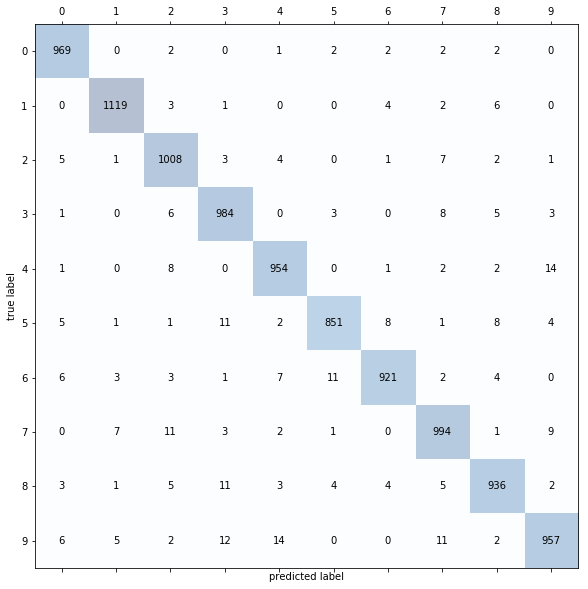

In [0]:
# 混同行列をグラフで出力する関数
def plot_cm(y_true, y_pred):
    confmat = cm(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xticks(np.arange(0, 10, 1)) # x軸の目盛りを指定
    plt.yticks(np.arange(0, 10, 1)) # y軸の目盛りを指定
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()
    
# 混同行列をグラフで出力
# testデータに対して行うことに注意
plot_cm(y_test, result)

In [0]:
# 性能指標を確認（正解ラベルデータはOne-Hot表現ではなく、クラス数値の表現を入力していることに注意）
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, result))
print('recall: %.3f' % metrics.recall_score(y_test, result, average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, result, average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, result, average='macro'))

accuracy: 0.969
recall: 0.969
precision: 0.969
f1_score: 0.969


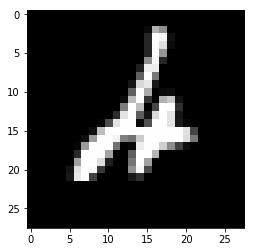

正解：4  予測：2


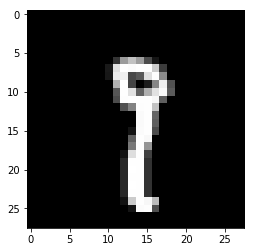

正解：9  予測：7


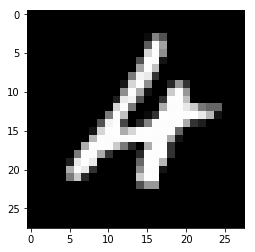

正解：4  予測：2


In [0]:
# 予想が外れたデータを表示
# 今回は3つだけ表示
count = 0
for i in range(len(y_test)):
    # 予測はクラスの確率的表現（softmax関数より）で出てくるのでargmaxで最大の列番号を取得
    pred = model.predict(X_test[i].reshape(1, 28, 28)).argmax()
    # ans = y_test[index]　（実際のコードはans = y_test[i]） でも大丈夫です
    ans  = Y_test[i].argmax()
    
    # 正解が4か9のサンプルについてだけ確認
    if (ans != 9) and (ans != 4):
        continue
        
    # 予測が間違っていたらリストへ格納
    if pred != ans:
        count += 1
        # 予測を間違えた画像を3枚だけ表示
        if count > 3:
            break
        plt.imshow(X_test[i])
        plt.show()
        print("正解：{}  予測：{}".format(ans, pred))

In [0]:
# モデルの保存
# モデルはjson形式、パラメータはhdf5形式でそれぞれ保存（通常はパラメータだけ保存すれば問題ない）

# モデルをJSON形式に変換。あとはテキストを保存する要領で書き出し可能。
json_string = model.to_json()
with open('mnist.model', 'w') as f:
    f.write( json_string)
    
# モデルパラメータの書き出し（Kerasにおいてはこちらの方が重要）
model.save_weights('param.hdf5')
print('Saved the model.')

Saved the model.


In [0]:
# モデルの読込
# 保存したjsonファイルとhdf5ファイルを読み込む。モデルを学習に使うにはcompileが必要。
from keras.models import model_from_json

# JSON形式のデータを読み込んでモデルとして復元。学習で使うにはまたコンパイルが必要なので注意。
with open('mnist.model', 'r') as f:
    json_string = f.read()
model = model_from_json(json_string)

# モデルにパラメータを読み込む。前回の学習状態を引き継げる。
model.load_weights('param.hdf5')
print('Loaded the model.')

Loaded the model.


In [0]:
# Google driveに保存する
from google.colab import drive
drive.mount('./keras_model')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./keras_model


In [0]:
#save_model_dir = "keras_model/'My Drive'/'Colab Notebooks'/AI_STANDARD/keras_model"
!ls -la

total 8300
drwxr-xr-x 1 root root    4096 Jun 19 14:58 .
drwxr-xr-x 1 root root    4096 Jun 19 14:13 ..
drwxr-xr-x 1 root root    4096 Jun 14 16:05 .config
drwx------ 3 root root    4096 Jun 19 14:58 keras_model
-rw-r--r-- 1 root root    2862 Jun 19 14:52 mnist.model
-rw-r--r-- 1 root root 8473400 Jun 19 14:52 param.hdf5
drwxr-xr-x 1 root root    4096 May 31 16:17 sample_data


In [0]:
%%bash
cp mnist.model keras_model/'My Drive'/'Colab Notebooks'/AI_STANDARD/keras_model/
cp param.hdf5 keras_model/'My Drive'/'Colab Notebooks'/AI_STANDARD/keras_model/